In [39]:
!pip install numpy pandas matplotlib pyarrow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


Recount to be sure

In [40]:
import os
import ast
import glob

In [46]:
dtype_spec = {
    'sent': int,
    'words': int,
    'sp_tokens': int,
    'tags_count': int
}

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'map_articles*.csv'))
dir_path = os.path.join('..', '..', 'data', 'mulabel', 'raw')

dfs = []
for file in file_paths:
    print(f'Reading file {file}')
    tmp_df = pd.read_csv(file, dtype=dtype_spec)
    tmp_df['tags'] = tmp_df['tags'].apply(ast.literal_eval)
    dfs.append(tmp_df)

article_df = pd.concat(dfs, ignore_index=True)
print(f'{article_df["lang"].unique()}')

print(f'Number of samples: {article_df.shape[0]}')
print(f'And columns: {article_df.columns}')

Reading file ../../data/mulabel/raw/map_articles_2023_01.csv
Reading file ../../data/mulabel/raw/map_articles_2023_02.csv
Reading file ../../data/mulabel/raw/map_articles_2023_03.csv
Reading file ../../data/mulabel/raw/map_articles_2023_04.csv
Reading file ../../data/mulabel/raw/map_articles_2023_05.csv
Reading file ../../data/mulabel/raw/map_articles_2023_06.csv
Reading file ../../data/mulabel/raw/map_articles_2023_07.csv
Reading file ../../data/mulabel/raw/map_articles_2023_08.csv
Reading file ../../data/mulabel/raw/map_articles_2023_09.csv
Reading file ../../data/mulabel/raw/map_articles_2023_10.csv
Reading file ../../data/mulabel/raw/map_articles_2023_11.csv
Reading file ../../data/mulabel/raw/map_articles_2023_12.csv
['sl' 'sq' 'mk' 'sr' 'bs' 'hr' 'en' 'ru' 'hu' 'pl' 'es' 'it' 'sk' 'cs'
 'uk' 'ro' 'el' 'bg' 'de' 'zh' 'pt']
Number of samples: 1068261
And columns: Index(['id', 'uuid', 'public', 'created', 'published', 'country',
       'mon_country', 'lang', 'script', 'm_id', 'rel_p

In [42]:
from collections import Counter

# Create a list of all tags
all_tags = []
for tags in article_df['tags']:
    all_tags.extend(tags)

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Construct the tag counts dataframe
tag_dict = {'tag':[], 'count':[]}
for label, count in tag_counts.items():
    tag_dict['tag'].append(label)
    tag_dict['count'].append(count)

tag_df = pd.DataFrame(tag_dict).sort_values('tag', ascending=False)
tag_df.head(10)

,tag,count
2438,fffe536f,267
5099,ffe71ea6,1
1202,ffde2d33,434
3102,ffdc8e52,30
8517,ffcb1e8a,1
2480,ffc952ac,213
2253,ffc3aea2,29
2757,ffc2fd04,6
3682,ffbffbe1,50
4159,ffbfe15d,20


In [43]:
num_tags = tag_df.shape[0]
print(num_tags)

9450


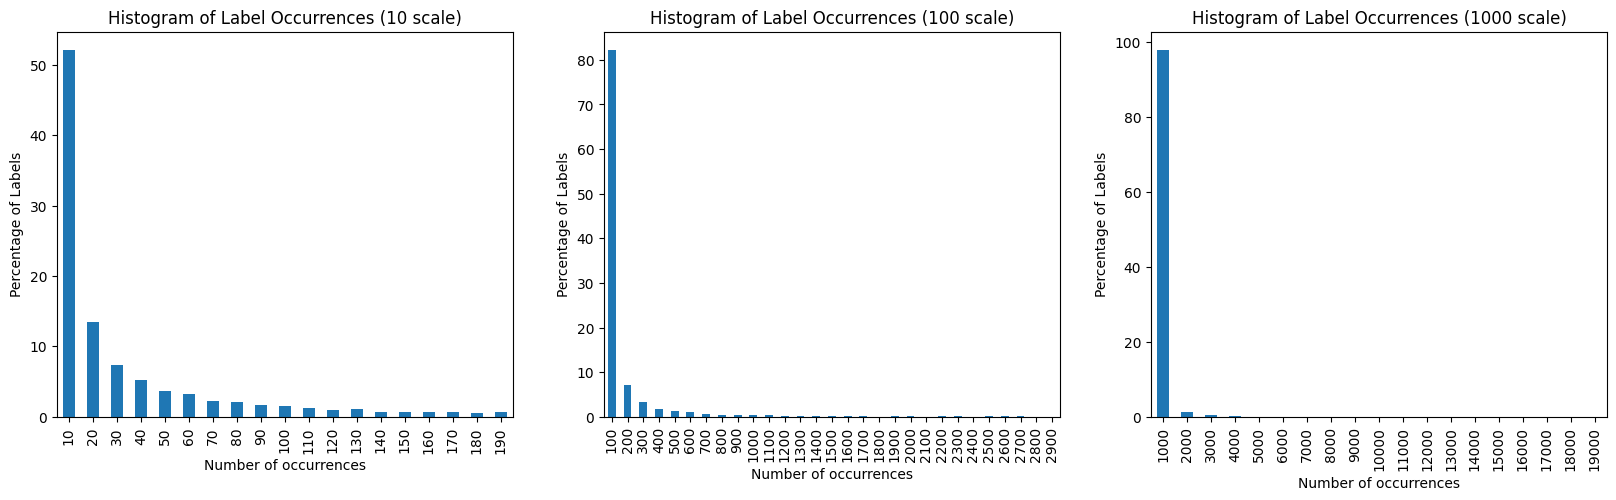

In [44]:
ocurr10_bins = [i for i in range(0, 200, 10)]
ocurr10_histogram_counts = pd.cut(tag_df['count'], bins=ocurr10_bins).value_counts().sort_index()
ocurr10_histogram_percentages = (ocurr10_histogram_counts / ocurr10_histogram_counts.sum()) * 100

ocurr100_bins = [i for i in range(0, 3000, 100)]
ocurr100_histogram_counts = pd.cut(tag_df['count'], bins=ocurr100_bins).value_counts().sort_index()
ocurr100_histogram_percentages = (ocurr100_histogram_counts / ocurr100_histogram_counts.sum()) * 100

ocurr1000_bins = [i for i in range(0, 20000, 1000)]
ocurr1000_histogram_counts = pd.cut(tag_df['count'], bins=ocurr1000_bins).value_counts().sort_index()
ocurr1000_histogram_percentages = (ocurr1000_histogram_counts / ocurr1000_histogram_counts.sum()) * 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
ocurr10_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Label Occurrences (10 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[0].set_xticklabels(ocurr10_bins[1:])

ocurr100_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Label Occurrences (100 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[1].set_xticklabels(ocurr100_bins[1:])

ocurr1000_histogram_percentages.plot(
    ax=axs[2], kind='bar', 
    title='Histogram of Label Occurrences (1000 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[2].set_xticklabels(ocurr1000_bins[1:])
plt.show()

Compute label density:

In [45]:
num_tags = tag_df.shape[0]
num_samples = article_df.shape[0]
tags_diversity = {} 
sum_tags_per_sample = 0
sum_tags_over_all = 0
sample_tag_counts = []
for tags in article_df['tags']:
    sum_tags_per_sample += len(tags)
    sample_tag_counts.append(len(tags))
    sum_tags_over_all += (len(tags) / num_tags)
    tags_s = str(sorted(set(tags)))
    if not tags_s in tags_diversity:
        tags_diversity[tags_s] = 1
    else:
        tags_diversity[tags_s] += 1
    
label_density = sum_tags_over_all / num_samples
label_cardinality = sum_tags_per_sample / num_samples
label_diversity = len(tags_diversity)
    

print(f'Label density: {label_density}')
print(f'Label cardinality: {label_cardinality}')
print(f'Label diversity: {label_diversity}')

std_dev_cols = np.std(sample_tag_counts, axis=0)
mean_cols = np.mean(sample_tag_counts, axis=0)
print(f"Mean {mean_cols} Standard deviation {std_dev_cols} along columns:")


Label density: 0.0003504077749284195
Label cardinality: 3.3113534730748206
Label diversity: 88630
Mean 3.3113534730748206 Standard deviation 3.962244611569129 along columns:
